In [1037]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

df = pd.read_csv('colchange3.csv')

In [1038]:
print(df.isnull().values.any())

False


In [1039]:
print(df)

          발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
0      259000  21    0      4          1     9     0     0     0     0    0   
1      259000  21    0      4          1     9     0     0     0     0    1   
2      259000  21    0      4          1     9     0     0     0     0    2   
3      259000  21    0      4          1     9     0     0     0     0    3   
4      259000  21    0      4          1     9     0     0     0     0    4   
...       ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
43948  209000  28    0     10          1     9     0     0     0     0   88   
43949  209000  28    0     10          1     9     0     0     0     0   89   
43950  209000  28    0     10          1     9     0     0     0     0   90   
43951  209000  28    0     10          1     9     0     0     0     0   91   
43952  209000  28    0     10          1     9     0     0     0     0   92   

       nike  jordan  newbalance  adidas  converse  

In [1040]:
data= df[(df['day'] == 1)]

In [1041]:
print(data)

          발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
1      259000  21    0      4          1     9     0     0     0     0    1   
93     149000  24    0      9          1     9     0     0     0     0    1   
185    139000  17    0      5          2     9     1     0     0     0    1   
278    149000  24    0      2          1     9     0     0     0     0    1   
368     99000  18    0      1          1     9     0     0     0     0    1   
...       ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
43493  284400  25    0     12          1     6     0     0     0     0    1   
43584  600000  26    0      9          2     1     1     0     0     0    1   
43676  309000  25    0      4          1     4     0     0     0     0    1   
43768  289000  25    0     10          1     9     0     0     0     0    1   
43861  209000  28    0     10          1     9     0     0     0     0    1   

       nike  jordan  newbalance  adidas  converse  

In [1042]:
data = data.sample(frac=1).reset_index(drop=True)

In [1043]:
print(data)

        발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
0    129000  28    0     11          1     6     0     0     0     0    1   
1    129000  29    0      8          3     8     4    10     0     0    1   
2    119000  29    0      1          3    10     1     1     0     0    1   
3    209000  28    0     10          1     9     0     0     0     0    1   
4     99000  25    0      5          1     4     0     0     0     0    1   
..      ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
472  169000   1    0      9          3     1     2     0     0     0    1   
473  259000   4    0      7          2     9     1     0     0     0    1   
474  129000  17    0      5          2     1     1     0     0     0    1   
475  179000   1    0      9          3     9     1     9     0     0    1   
476  119000  29    0     11          4     9     1     1     5     0    1   

     nike  jordan  newbalance  adidas  converse  콜라보유무  type  
0       0   

In [1044]:
print(data.isnull().values.any())

False


In [1045]:
print(data.groupby('type').size().reset_index(name = 'count'))

   type  count
0     0    125
1     1    352


In [1046]:
y = data["type"]

In [1047]:
print(y)

0      1
1      1
2      1
3      0
4      1
      ..
472    1
473    0
474    1
475    1
476    1
Name: type, Length: 477, dtype: int64


In [1048]:
from sklearn.preprocessing import StandardScaler
X = data[['콜라보유무', 'converse', 'jordan', 'nike', '라인', '콜라보', 'col3', 'col5', 'color_num']]
scaler = StandardScaler()
scaler.fit(X)
scale_X = scaler.fit_transform(X)
scale_X  = np.asarray(X).astype(np.float64)
print(scale_X)

[[ 1.  1.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ... 10.  0.  3.]
 [ 0.  0.  0. ...  1.  0.  3.]
 ...
 [ 0.  0.  0. ...  0.  0.  2.]
 [ 0.  0.  0. ...  9.  0.  3.]
 [ 0.  0.  0. ...  1.  0.  4.]]


In [1049]:
print(scale_X)

[[ 1.  1.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ... 10.  0.  3.]
 [ 0.  0.  0. ...  1.  0.  3.]
 ...
 [ 0.  0.  0. ...  0.  0.  2.]
 [ 0.  0.  0. ...  9.  0.  3.]
 [ 0.  0.  0. ...  1.  0.  4.]]


In [1050]:
train_x, test_x, y_train, y_test = train_test_split(scale_X, y, test_size = 0.3, random_state = 1)

In [1051]:
print(y_train)

39     1
341    1
314    1
192    0
164    1
      ..
255    1
72     1
396    1
235    1
37     1
Name: type, Length: 333, dtype: int64


In [1052]:
train__y = list(y_train)

In [1053]:
train_y = np.empty((len(y_train),2))

In [1054]:
print(train__y)
print(type(train__y[0]))

[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]


In [1055]:
for i in range(len(train__y)):
    if train__y[i] == 0:
        train_y[i] = [1, 0]
    elif train__y[i] == 1:
        train_y[i] = [0, 1]
    else:
        train_y[i] = [0, 1]

In [1056]:
print(train_y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 

In [1057]:
test__y = list(y_test)

In [1058]:
test_y = np.empty((len(y_test),2))

In [1059]:
for i in range(len(test__y)):
    if test__y[i] == 0:
        test_y[i] = [1, 0]
    elif test__y[i] == 1:
        test_y[i] = [0, 1]
    else:
        test_y[i] = [0, 1]

In [1060]:
model = tf.keras.Sequential()  
model.add(layers.Dense(18, input_shape=(9,)))  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.01))        

model.add(layers.Dense(18))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(2))
model.add(layers.Activation('softmax')) 

# 모델 구축
model.compile(
    loss= 'binary_crossentropy', 
    optimizer="adam",   
    metrics=['accuracy'])  

In [1061]:
hist = model.fit(
    train_x, train_y,
    batch_size = 10,  
    epochs = 200,      
    validation_split = 0.2,
    shuffle = False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 30)],
    verbose=1)  

# 테스트 데이터로 성능평가
score = model.evaluate(test_x, test_y)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/200
27/27 [==============================] - 0s 12ms/step - loss: 0.6040 - accuracy: 0.7180 - val_loss: 0.5847 - val_accuracy: 0.7164
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7218 - val_loss: 0.5814 - val_accuracy: 0.7164
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7293 - val_loss: 0.5755 - val_accuracy: 0.7164
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.7218 - val_loss: 0.5742 - val_accuracy: 0.7164
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7218 - val_loss: 0.5773 - val_accuracy: 0.7164
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.7218 - val_loss: 0.5763 - val_accuracy: 0.7164
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.7256 - val_loss: 0.5753 - val_accuracy: 0.7164
Epoch 8/200


Epoch 59/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7632 - val_loss: 0.5749 - val_accuracy: 0.7164
Epoch 60/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7594 - val_loss: 0.5716 - val_accuracy: 0.7164
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7669 - val_loss: 0.5711 - val_accuracy: 0.7164
Epoch 62/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7917
test_loss:  0.4748517572879791
test_acc:  0.7916666865348816


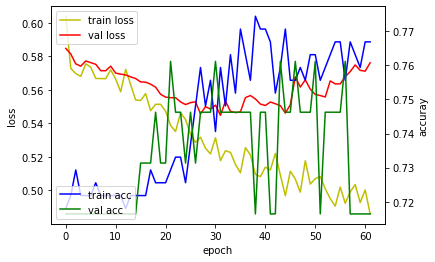

In [1062]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [1063]:
y_pred = model.predict(test_x)

In [1064]:
print(y_pred)

[[0.0945966  0.90540344]
 [0.19727658 0.80272347]
 [0.10342956 0.89657044]
 [0.35718846 0.64281154]
 [0.23141108 0.7685889 ]
 [0.19727658 0.80272347]
 [0.09198134 0.9080187 ]
 [0.66522527 0.33477473]
 [0.17598651 0.8240135 ]
 [0.11146092 0.88853914]
 [0.18386158 0.81613845]
 [0.545839   0.45416093]
 [0.34860116 0.6513988 ]
 [0.26558316 0.7344169 ]
 [0.18567012 0.8143299 ]
 [0.33554026 0.6644597 ]
 [0.1377426  0.8622575 ]
 [0.26558316 0.7344169 ]
 [0.30766442 0.6923356 ]
 [0.26558316 0.7344169 ]
 [0.32374668 0.6762533 ]
 [0.3188201  0.68117994]
 [0.35718846 0.64281154]
 [0.07860617 0.9213938 ]
 [0.3848475  0.6151526 ]
 [0.85894316 0.14105685]
 [0.26558316 0.7344169 ]
 [0.35718846 0.64281154]
 [0.26558316 0.7344169 ]
 [0.01693133 0.9830687 ]
 [0.10342953 0.89657044]
 [0.19774374 0.8022562 ]
 [0.28083003 0.71917   ]
 [0.39580235 0.60419756]
 [0.26558316 0.7344169 ]
 [0.26558316 0.7344169 ]
 [0.42566663 0.5743334 ]
 [0.35718846 0.64281154]
 [0.23052587 0.7694741 ]
 [0.17018601 0.829814  ]


In [1065]:
y_class = y_pred.argmax(axis=-1)
y_class

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [1066]:
print(test__y)

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [1067]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix, f1_score
precision = precision_score(test__y, y_class, average = 'weighted')
print(precision)

0.7630208333333334


In [1068]:
recall = recall_score(test__y, y_class, average ='weighted')
print(recall)

0.7916666666666666


In [1070]:
print(f1_score(test__y, y_class, average= 'weighted'))

0.7638888888888888


In [1071]:
confusion_matrix(test__y, y_class)

array([[  9,  23],
       [  7, 105]], dtype=int64)